In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import pickle

from keras.datasets import mnist
from collections import Counter

In [30]:
def get_digit(num):
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    label_counts = list(dict(sorted(Counter(y_train).items())).values())
    indexs = np.arange(len(X_train))
    indexs = [x for _, x in sorted(zip(y_train, indexs))]
    images = [X_train[i] for i in indexs]
    offset = sum(label_counts[:num])
    return images[offset]

def add_moving_mnist(num, dest, start_N = 0):

    digit_image = get_digit(num) / 255
    (N, m, m) = dest.shape # m is the side of the box

    # Create random coordinate
    coords = np.array([np.random.randint(15,m-15),np.random.randint(15,m-15)])
    velocity = np.array([np.random.randint(1,2), -np.random.randint(1,2)])

    pad_width = 5
    for n in range(start_N, N):
        # Draw the image
        x = int(coords[0]) + pad_width
        y = int(coords[1]) + pad_width

        temp = np.pad(dest[n,:,:], pad_width)
        temp[x-14:x+14,y-14:y+14] += digit_image[:,:]
        dest[n,:,:] += temp[pad_width:m+pad_width,pad_width:m+pad_width]

        # Update the coords based off of velocity
        coords += velocity

        # Checks if we hit a wall
        boundary = 15
        for c in range(2):

            # Checks if we bound
            if coords[c] + boundary > m or coords[c] - boundary < 0:
                # Reverse velocity!
                velocity[c] *= -1 
        n += 1

    return np.clip(dest, 0, 255)

N = 10000
m = 50
data = np.zeros((N,m,m,3), dtype=float)
data[...,0] = add_moving_mnist(3,data[...,0])
data[...,1]= add_moving_mnist(6,data[...,1])
data[...,2] = add_moving_mnist(1,data[...,2])

In [31]:
pickle.dump(data, open("coloredMovingMNIST.pkl", "wb"))

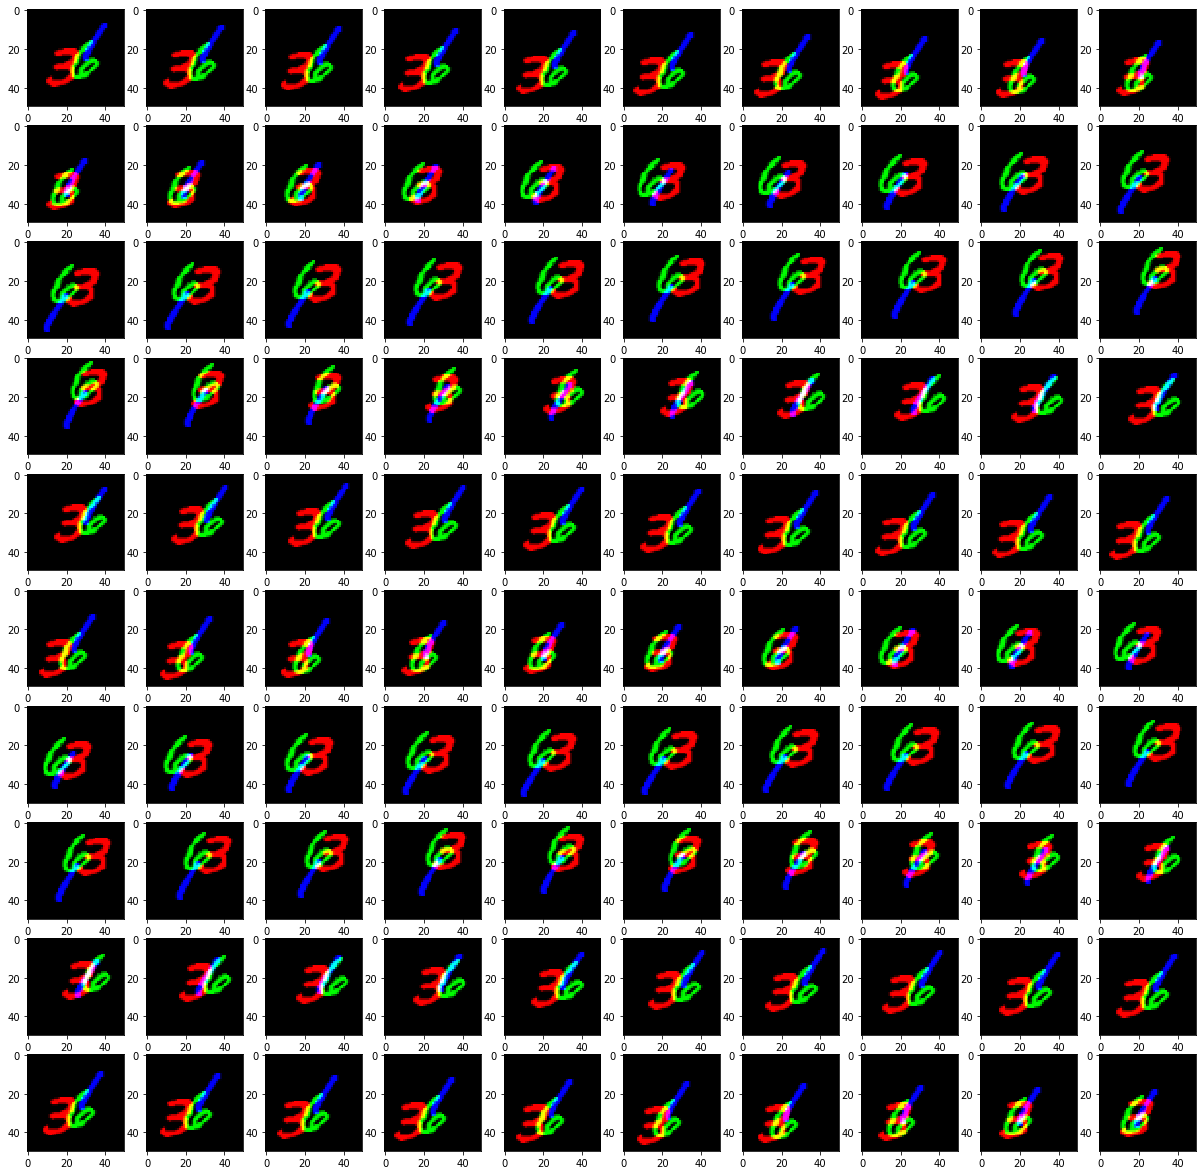

In [32]:
fig, axs = plt.subplots(10,10,figsize=(21,21))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(data[i*10+j])

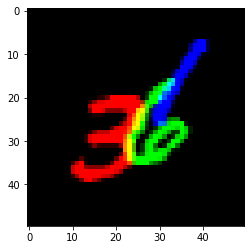

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [33]:
def animate(i):
    global im
    im.set_array(data[i])
    return im,

fig = plt.figure()
im = plt.imshow(data[0], animated = True)
ani = FuncAnimation(fig, animate, interval = 200, frames = 200, blit=True)
plt.show()
ani.save("coloredMovingMNIST.gif")